# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 576


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
units = "metric"

# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_response = requests.get(city_url)
        city_weather = weather_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | krasnokuts'k
Processing Record 2 of Set 1 | dabat
Processing Record 3 of Set 1 | arraial do cabo
Processing Record 4 of Set 1 | udachny
Processing Record 5 of Set 1 | parras de la fuente
Processing Record 6 of Set 1 | lihue
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | atafu village
Processing Record 10 of Set 1 | invercargill
Processing Record 11 of Set 1 | edinburgh of the seven seas
Processing Record 12 of Set 1 | trenggalek
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | susuman
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | ilulissat
Processing Record 17 of Set 1 | san patricio
Processing Record 18 of Set 1 | kapuskasing
Processing Record 19 of Set 1 | ribeira grande
Processing Record 20 of Set 1 | bethel
Processing Record 21 of Set 1 | puerto san jose
Processing R

Processing Record 39 of Set 4 | viedma
Processing Record 40 of Set 4 | turpan
Processing Record 41 of Set 4 | bushland beach
City not found. Skipping...
Processing Record 42 of Set 4 | broome
Processing Record 43 of Set 4 | glendive
Processing Record 44 of Set 4 | paka
Processing Record 45 of Set 4 | pisco
Processing Record 46 of Set 4 | queenstown
Processing Record 47 of Set 4 | berdigestyakh
Processing Record 48 of Set 4 | prince george
Processing Record 49 of Set 4 | vorgashor
Processing Record 0 of Set 5 | sisimiut
Processing Record 1 of Set 5 | broken hill
Processing Record 2 of Set 5 | tura
Processing Record 3 of Set 5 | happy valley-goose bay
Processing Record 4 of Set 5 | ayr
Processing Record 5 of Set 5 | bucerias
Processing Record 6 of Set 5 | bumba
Processing Record 7 of Set 5 | gadzhiyevo
Processing Record 8 of Set 5 | at taraf
Processing Record 9 of Set 5 | kashgar
Processing Record 10 of Set 5 | mpulungu
Processing Record 11 of Set 5 | viqueque
Processing Record 12 of Set

Processing Record 30 of Set 8 | pizarro
Processing Record 31 of Set 8 | polyarnyy
Processing Record 32 of Set 8 | sinabang
Processing Record 33 of Set 8 | karuri
Processing Record 34 of Set 8 | ilomantsi
Processing Record 35 of Set 8 | howard springs
Processing Record 36 of Set 8 | griffith
Processing Record 37 of Set 8 | sorong
Processing Record 38 of Set 8 | polyany
Processing Record 39 of Set 8 | benghazi
Processing Record 40 of Set 8 | villamontes
Processing Record 41 of Set 8 | alegrete
Processing Record 42 of Set 8 | tocopilla
Processing Record 43 of Set 8 | kolpashevo
Processing Record 44 of Set 8 | labytnangi
Processing Record 45 of Set 8 | turkmenbasy
Processing Record 46 of Set 8 | karaidel'
Processing Record 47 of Set 8 | qui nhon
Processing Record 48 of Set 8 | machico
Processing Record 49 of Set 8 | trondheim
Processing Record 0 of Set 9 | monrovia
Processing Record 1 of Set 9 | crane
Processing Record 2 of Set 9 | dzhalagash
Processing Record 3 of Set 9 | whitefish
Proces

Processing Record 22 of Set 12 | fria
Processing Record 23 of Set 12 | yanchep
Processing Record 24 of Set 12 | ouesso
Processing Record 25 of Set 12 | mandan
-----------------------------
Data Retrieval Complete      
-----------------------------


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          556
Lat           556
Lng           556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Country       556
Date          556
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,krasnokuts'k,50.0660,35.1628,12.20,77,35,10.41,UA,1699774301
1,dabat,12.9842,37.7650,17.45,51,39,2.31,ET,1699774302
2,arraial do cabo,-22.9661,-42.0278,22.77,91,23,5.83,BR,1699774302
3,udachny,66.4167,112.4000,-15.95,95,100,3.89,RU,1699774302
4,parras de la fuente,25.4167,-102.1833,13.02,88,100,3.37,MX,1699774303


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,krasnokuts'k,50.0660,35.1628,12.20,77,35,10.41,UA,1699774301
1,dabat,12.9842,37.7650,17.45,51,39,2.31,ET,1699774302
2,arraial do cabo,-22.9661,-42.0278,22.77,91,23,5.83,BR,1699774302
3,udachny,66.4167,112.4000,-15.95,95,100,3.89,RU,1699774302
4,parras de la fuente,25.4167,-102.1833,13.02,88,100,3.37,MX,1699774303


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

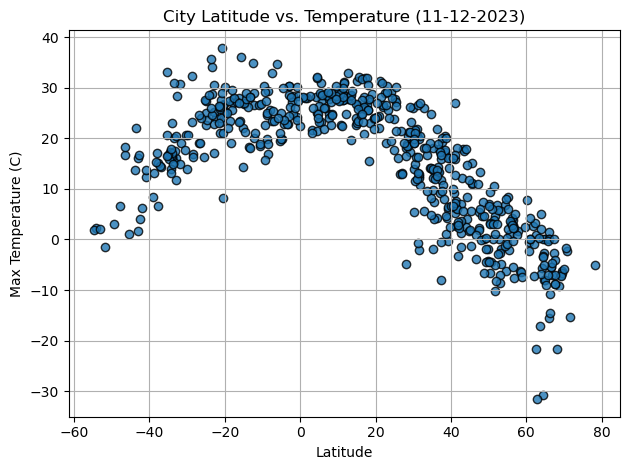

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], alpha=.8, edgecolors="k")

#Format the date
date = datetime.now()
date = date.strftime("%m-%d-%Y")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude vs. Temperature ({date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()



#### Latitude Vs. Humidity

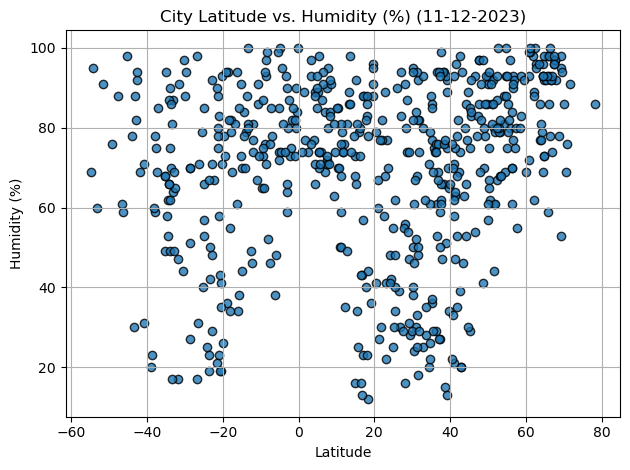

In [16]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], alpha=.8, edgecolors="k")

#Format the date
date = datetime.now()
date = date.strftime("%m-%d-%Y")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity (%) ({date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

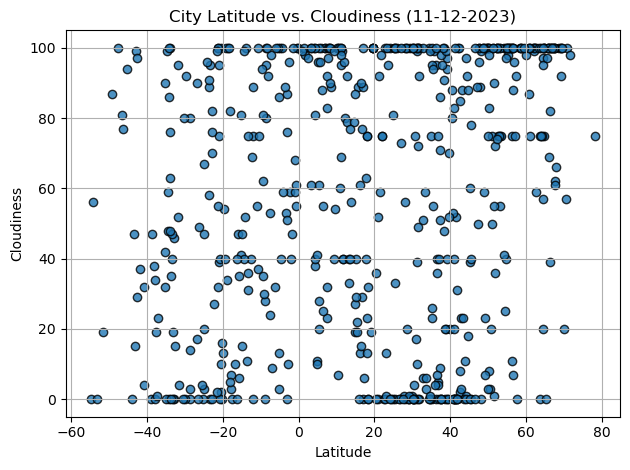

In [18]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], alpha=.8, edgecolors="k")

#Format the date
date = datetime.now()
date = date.strftime("%m-%d-%Y")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()



#### Latitude vs. Wind Speed Plot

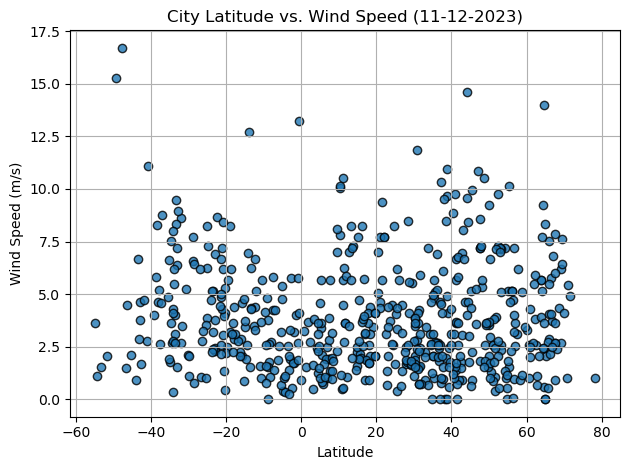

In [19]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], alpha=.8, edgecolors="k")

#Format the date
date = datetime.now()
date = date.strftime("%m-%d-%Y")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [54]:
# Define a function to create Linear Regression plots
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


In [55]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) > 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vrangel',42.7297,133.0839,-1.54,39,2,6.97,RU,1699768102
2,ursulo galvan,22.7333,-98.3000,19.07,89,100,0.69,MX,1699768104
3,iqaluit,63.7506,-68.5145,-17.15,77,0,5.66,CA,1699768104
4,thompson,55.7435,-97.8558,1.09,80,100,5.14,CA,1699768104
5,olonkinbyen,70.9221,-8.7187,-2.35,76,100,5.42,SJ,1699768104


In [56]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,3.09,76,87,15.26,TF,1699768103
6,lorengau,-2.0226,147.2712,28.29,75,40,3.20,PG,1699768105
7,port alfred,-33.5906,26.8910,20.10,70,35,4.02,ZA,1699768105
9,blackmans bay,-43.0167,147.3167,16.07,82,99,4.62,AU,1699768105
10,adamstown,-25.0660,-130.1015,22.62,85,47,6.23,PN,1699768045


###  Temperature vs. Latitude Linear Regression Plot

r-value: 0.24038949314663735


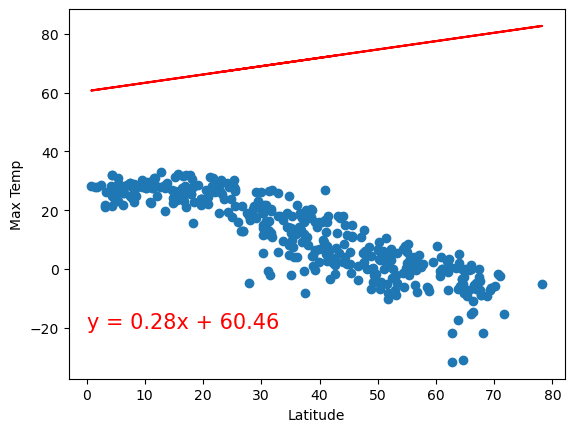

In [57]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(0,-20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f'r-value: {rvalue}')

r-value: 0.6428391652207588


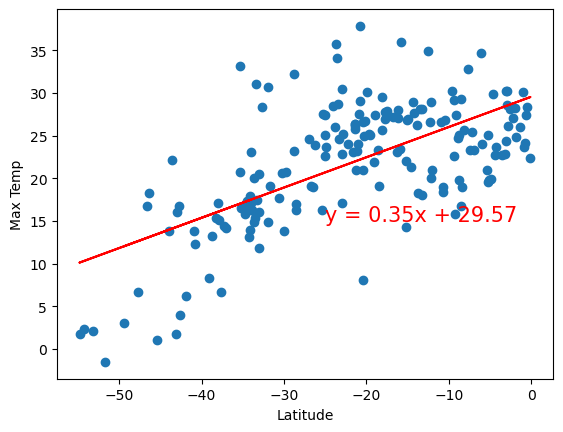

In [60]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f'r-value: {rvalue}')


**Discussion about the linear relationship:** The northern hemisphere shows a negative relationship between temperature and latitude while the southern hemisphere shows a positive one. As you move closer to the equator the temprature increases and when moving further away it decreases.

### Humidity vs. Latitude Linear Regression Plot

r-value: 0.24038949314663735


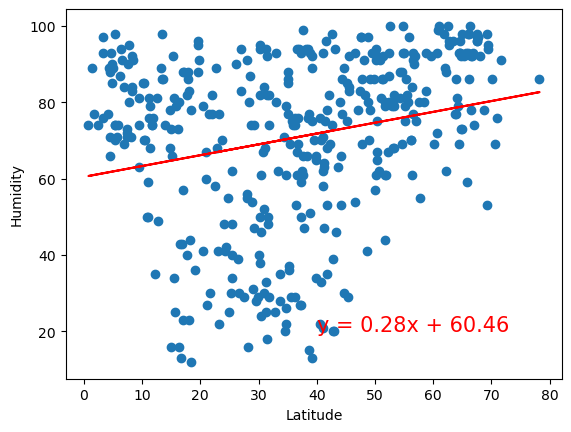

In [61]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f'r-value: {rvalue}')

r-value: 0.165806860187876


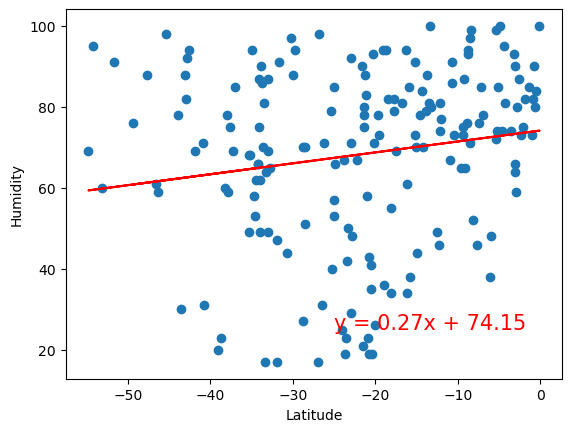

In [33]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f'r-value: {rvalue}')

**Discussion about the linear relationship:** There is positive correlation between latitude and humidity in both the northern and southern hemispheres. As you move closer to the equator humidity increases.

### Cloudiness vs. Latitude Linear Regression Plot

r-value: 0.15195174674396197


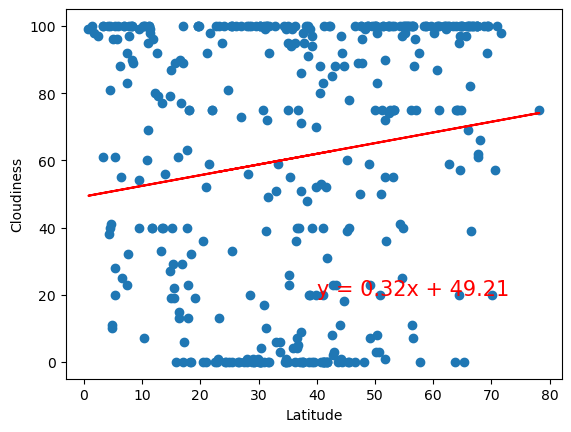

In [35]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f'r-value: {rvalue}')

r-value: 0.19523103819111962


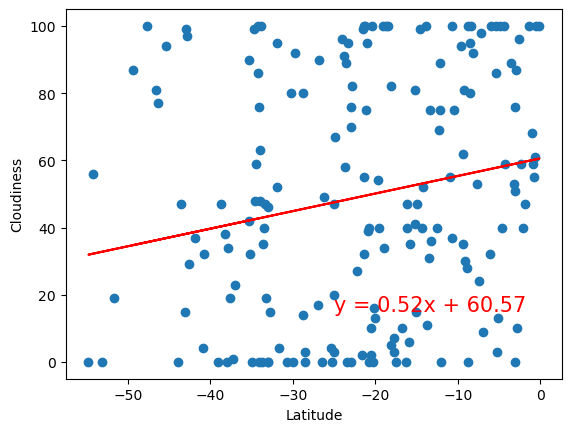

In [36]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f'r-value: {rvalue}')

**Discussion about the linear relationship:** There is a very weak correlation between latitude and cloudiness. The southern hemisphere has an even weaker correlation than the northern potentially due to there being less land mass. In general though cloudiness increases nearer the equator.

### Wind Speed vs. Latitude Linear Regression Plot

r-value: 0.0811972638486484


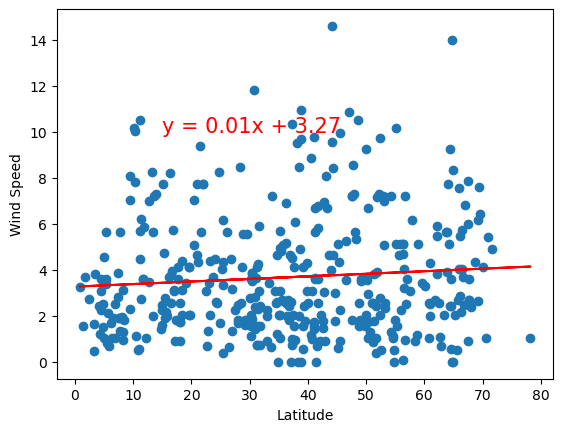

In [67]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(15,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f'r-value: {rvalue}')

r-value: -0.2543633869182002
The correlation between both factors is -0.25


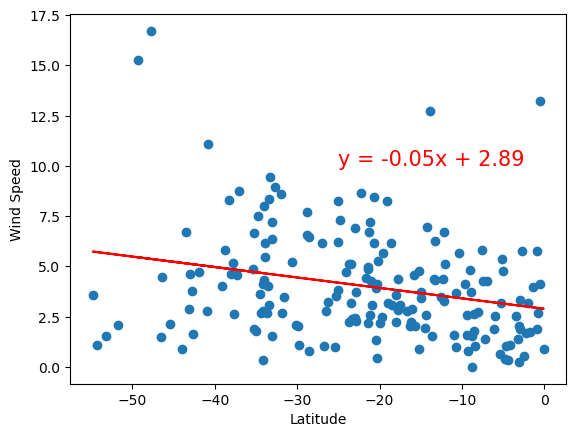

In [66]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f'r-value: {rvalue}')

**Discussion about the linear relationship:** There is a weak correlation between wind speed and latitude. Wind speed in the northern hemisphere is reasonbly consistent but in the sourthern hemisphere wind speed appears to be higher further from the equator 